# `Imported Libraries`.

In [135]:
import os
import io
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as tkr
import xlsxwriter
import scipy.stats
import dataframe_image as dfi
import warnings

#==#

from io import BytesIO
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
from matplotlib import colormaps
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.cbook import boxplot_stats
from pandas.io.formats.style import Styler
from pandas.io.formats.excel import ExcelFormatter
from openpyxl import Workbook
from scipy import stats
from fpdf import FPDF
from PIL import Image
from IPython.display import HTML, display
from sklearn.linear_model import LinearRegression

#==#

#pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
%matplotlib inline

# `Load Dataframe`.

- `.copy data set when you want to test something out so you won’t have to re-run the entire notebook if you make a mistake somewhere`. 

In [136]:
file_path = r"C:\Users\tailb\Downloads\sales_2020-01-01_2022-01-31.xlsx"
coffee_sales = pd.read_excel(file_path)
df = coffee_sales.copy()
df.head(3)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,NaN,United Kingdom,NaN,Butleigh,United Kingdom,NaN,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,NaN,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,NaN,United Kingdom,NaN,Hinckley,United Kingdom,NaN,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,NaN,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,NaN,United Kingdom,NaN,Butleigh,United Kingdom,NaN,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,NaN,4,30.0,0.0,0.0,30.0,0.0,0.0,30.0


# `Analyse Dataframe`.

  - 1.`Display dataframe statistics`

In [137]:
df.describe()

,hour,order_id,pos_location_name,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
count,81946,8.194600e+04,0.0,81946.000000,81946.000000,81946.000000,81946.000000,81946.000000,81946.000000,81946.000000,81946.000000
mean,2021-01-11 09:58:47.952554240,2.944383e+12,NaN,0.995155,19.327701,-3.769785,-0.220846,15.337071,0.339425,0.417555,16.094051
min,2020-01-01 09:00:00,1.883255e+12,NaN,-20.000000,0.000000,-789.300000,-3320.000000,-3320.000000,-51.970000,-664.000000,-3984.000000
25%,2020-06-27 17:00:00,2.206490e+12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-01-03 09:00:00,2.523092e+12,NaN,1.000000,7.700000,0.000000,0.000000,7.500000,0.000000,0.000000,7.500000
75%,2021-07-06 16:00:00,3.823967e+12,NaN,1.000000,16.400000,0.000000,0.000000,15.420000,0.000000,0.000000,16.000000
max,2022-01-31 13:00:00,4.131618e+12,NaN,100.000000,3541.670000,0.000000,0.000000,3541.670000,51.970000,708.330000,4250.000000
std,NaN,8.077024e+11,NaN,1.954842,77.165640,25.239349,13.578067,62.117179,1.566273,9.744879,69.884806


  - 2.`Display index`.

In [138]:
df.index

RangeIndex(start=0, stop=81946, step=1)

  - 3.`Display number of rows and columns`.

In [139]:
df.shape

(81946, 27)

  - 4.`Display the number of rows times number of columns`.

In [140]:
df.size

2212542

  - 5.`Display information about dataset`.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81946 entries, 0 to 81945
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_name      81936 non-null  object        
 1   customer_type      81936 non-null  object        
 2   hour               81946 non-null  datetime64[ns]
 3   order_id           81946 non-null  int64         
 4   sale_line_type     81946 non-null  object        
 5   sale_kind          81946 non-null  object        
 6   api_client_title   81946 non-null  object        
 7   pos_location_name  0 non-null      float64       
 8   billing_country    81933 non-null  object        
 9   billing_region     28027 non-null  object        
 10  billing_city       81930 non-null  object        
 11  shipping_country   81103 non-null  object        
 12  shipping_region    27831 non-null  object        
 13  shipping_city      81100 non-null  object        
 14  produc

  - 6.` Clean column headings`.

In [142]:
#Extract columns
cols = df.columns
#Create empty list
new_cols = []
#iterate to fix issues with names
for column in cols:
    #to proper case
    #proper_cols = column.title()
    #to lower case
    lower_cols = column.lower()
    #replace space/hyphen with underscore
    proper_cols_hyphen = lower_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    #append to empty list
    new_cols.append(clean_col)
#diplay columns
new_cols

#replace existing columns in dataframe with new
df.columns = new_cols

#preview
df.head(3)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,NaN,United Kingdom,NaN,Butleigh,United Kingdom,NaN,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,NaN,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,NaN,United Kingdom,NaN,Hinckley,United Kingdom,NaN,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,NaN,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,NaN,United Kingdom,NaN,Butleigh,United Kingdom,NaN,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,NaN,4,30.0,0.0,0.0,30.0,0.0,0.0,30.0


  - 7.`Display datatypes of each column`.

In [143]:
df.dtypes

customer_name                object
customer_type                object
hour                 datetime64[ns]
order_id                      int64
sale_line_type               object
sale_kind                    object
api_client_title             object
pos_location_name           float64
billing_country              object
billing_region               object
billing_city                 object
shipping_country             object
shipping_region              object
shipping_city                object
product_type                 object
product_vendor               object
product_title                object
variant_title                object
variant_sku                  object
net_quantity                  int64
gross_sales                 float64
discounts                   float64
returns                     float64
net_sales                   float64
shipping                    float64
taxes                       float64
total_sales                 float64
dtype: object

- 8.`Data Types and Type Conversion [Converting a float to a sting - e.g. order_id]`.

In [144]:
df.order_id = df.order_id.astype(str) # pos_location_name is no longer float64
df.dtypes

customer_name                object
customer_type                object
hour                 datetime64[ns]
order_id                     object
sale_line_type               object
sale_kind                    object
api_client_title             object
pos_location_name           float64
billing_country              object
billing_region               object
billing_city                 object
shipping_country             object
shipping_region              object
shipping_city                object
product_type                 object
product_vendor               object
product_title                object
variant_title                object
variant_sku                  object
net_quantity                  int64
gross_sales                 float64
discounts                   float64
returns                     float64
net_sales                   float64
shipping                    float64
taxes                       float64
total_sales                 float64
dtype: object

  - 9.`Show duplicates`.

In [145]:
df.duplicated() # Find duplicates. TRUE = Duplicated values present.

0        False
1        False
2        False
3        False
4        False
         ...  
81941    False
81942    False
81943    False
81944    False
81945    False
Length: 81946, dtype: bool

  - 10.`Show duplicates in columnar form`.

In [146]:
df.duplicated().any() # Find if there are any duplicates. TRUE = Duplicated values present. 

False

- `11.Delete/Remove duplicate rows based on all columns`.

In [147]:
#df.drop_duplicates() #(subset=None, keep=’first’, inplace=False, ignore_index=False)

 - 12.`Show null values in dataframe`.

In [148]:
df.isnull() # Display null/empty values. TRUE  = Null values present. # df.isna() can be used as well!

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
0,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81941,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81942,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81943,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81944,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


 - 13.`Display booleans for null/missing values in columnar form`.

In [149]:
df.isnull().any().to_frame('Boolean').sort_values(by='Boolean',ascending=False).reset_index().rename(columns={'index':'Column name'})

,Column name,Boolean
0,customer_name,True
1,billing_city,True
2,variant_sku,True
3,variant_title,True
4,product_title,True
5,product_vendor,True
6,product_type,True
7,customer_type,True
8,shipping_region,True
9,shipping_country,True


 - 14.`Display sum of missing values in columnar form - A`.

In [150]:
df.isnull().sum().to_frame('Sum of Missing Values').sort_values(by='Sum of Missing Values',ascending=False)\
    .reset_index().rename(columns={'index':'Column Name'}).style.format({"Sum of Missing Values": "{:,.0f}"})

,Column Name,Sum of Missing Values
0,pos_location_name,"81,946"
1,shipping_region,"54,115"
2,billing_region,"53,919"
3,variant_sku,"40,207"
4,variant_title,"36,543"
5,product_type,"32,625"
6,product_vendor,"32,243"
7,product_title,"32,232"
8,shipping_city,846
9,shipping_country,843


- 15.`Display the sum of missing values in columnar form - B`.

In [151]:
missing_sum = df.isnull().sum().round(2)
print(missing_sum)

customer_name           10
customer_type           10
hour                     0
order_id                 0
sale_line_type           0
sale_kind                0
api_client_title         0
pos_location_name    81946
billing_country         13
billing_region       53919
billing_city            16
shipping_country       843
shipping_region      54115
shipping_city          846
product_type         32625
product_vendor       32243
product_title        32232
variant_title        36543
variant_sku          40207
net_quantity             0
gross_sales              0
discounts                0
returns                  0
net_sales                0
shipping                 0
taxes                    0
total_sales              0
dtype: int64


- 16.`Display the sum of missing values in columnar form - C`(Function utilised).

In [152]:
def missing_cols(df):
    #prints out columns with its amount of missing values
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df)

customer_name => 10
customer_type => 10
pos_location_name => 81946
billing_country => 13
billing_region => 53919
billing_city => 16
shipping_country => 843
shipping_region => 54115
shipping_city => 846
product_type => 32625
product_vendor => 32243
product_title => 32232
variant_title => 36543
variant_sku => 40207


  - 17.`Display the % of null/missing values in columnar form - A`.

In [153]:
missing_pct = df.isnull().sum()/len(df) * 100
print(missing_pct.round(2))

customer_name          0.01
customer_type          0.01
hour                   0.00
order_id               0.00
sale_line_type         0.00
sale_kind              0.00
api_client_title       0.00
pos_location_name    100.00
billing_country        0.02
billing_region        65.80
billing_city           0.02
shipping_country       1.03
shipping_region       66.04
shipping_city          1.03
product_type          39.81
product_vendor        39.35
product_title         39.33
variant_title         44.59
variant_sku           49.07
net_quantity           0.00
gross_sales            0.00
discounts              0.00
returns                0.00
net_sales              0.00
shipping               0.00
taxes                  0.00
total_sales            0.00
dtype: float64


 # `Clean Dataframe`.

### `Handling missing values`.

In [154]:
df.fillna({'customer_name':'Not Stated',
           'customer_type':'Not Stated',
           'customer_type':'Not Stated',
           'pos_location_name':'Not Stated',
           'billing_country':'Not Stated',
           'billing_region':'Not Stated',
           'billing_city':'Not Stated',
           'shipping_country':'Not Stated',
           'shipping_region':'Not Stated',
           'shipping_city':'Not Stated',
           'product_type':'Not Stated',
           'product_vendor':'Not Stated',
           'product_title':'Not Stated',
           'variant_title':'Not Stated',
           'variant_sku':'Not Stated',     
           }, inplace=True)

- 1.`Display booleans for null/missing values in columnar form`.

In [155]:
df.isnull().any().to_frame('Boolean').sort_values(by='Boolean',ascending=False).reset_index().rename(columns={'index':'Column name'})

,Column name,Boolean
0,customer_name,False
1,product_type,False
2,taxes,False
3,shipping,False
4,net_sales,False
5,returns,False
6,discounts,False
7,gross_sales,False
8,net_quantity,False
9,variant_sku,False


- 2.`Display sum of missing values in columnar form - A`.

In [156]:
df.isnull().sum().to_frame('Sum of Missing Values').sort_values(by='Sum of Missing Values',ascending=False)\
    .reset_index().rename(columns={'index':'Column Name'}).style.format({"Sum of Missing Values": "{:,.0f}"})

,Column Name,Sum of Missing Values
0,customer_name,0
1,product_type,0
2,taxes,0
3,shipping,0
4,net_sales,0
5,returns,0
6,discounts,0
7,gross_sales,0
8,net_quantity,0
9,variant_sku,0


- 3.`Display the sum of missing values in columnar form - B`.

In [157]:
missing_sum = df.isnull().sum().round(2)
print(missing_sum)

customer_name        0
customer_type        0
hour                 0
order_id             0
sale_line_type       0
sale_kind            0
api_client_title     0
pos_location_name    0
billing_country      0
billing_region       0
billing_city         0
shipping_country     0
shipping_region      0
shipping_city        0
product_type         0
product_vendor       0
product_title        0
variant_title        0
variant_sku          0
net_quantity         0
gross_sales          0
discounts            0
returns              0
net_sales            0
shipping             0
taxes                0
total_sales          0
dtype: int64


- 4.`Display the sum of missing values in columnar form - C`(Function utilised).

In [158]:
def missing_cols(df):
    #prints out columns with its amount of missing values
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df)

no missing values left


- 5.`Display the % of null/missing values in columnar form - A`.

In [159]:
missing_pct = df.isnull().sum()/len(df) * 100
print(missing_pct.round(2))

#missing_pct = round(df.isnull().sum()/len(df) * 100, 2)
#print(missing_pct)

customer_name        0.0
customer_type        0.0
hour                 0.0
order_id             0.0
sale_line_type       0.0
sale_kind            0.0
api_client_title     0.0
pos_location_name    0.0
billing_country      0.0
billing_region       0.0
billing_city         0.0
shipping_country     0.0
shipping_region      0.0
shipping_city        0.0
product_type         0.0
product_vendor       0.0
product_title        0.0
variant_title        0.0
variant_sku          0.0
net_quantity         0.0
gross_sales          0.0
discounts            0.0
returns              0.0
net_sales            0.0
shipping             0.0
taxes                0.0
total_sales          0.0
dtype: float64


- 6.`Display the % of null/missing values in in columnar form - B`(Function utilised)

In [160]:
def missing_pct(df):
    for col in df.columns:
        pct = df[col].isnull().sum()/(len(df))
        #pct = df[col].isnull().sum()/(len(df)) * 100
        if(pct != 0):
            print(f"{col} => {pct:.2%}")
            #print("{} : {}%".format(col, round(pct,2)))
    if(pct == 0):
        print("no missing values left")

missing_pct(df)

no missing values left


## `Execution`.

In [161]:
df['date']=pd.to_datetime(df['hour']).dt.normalize()

#df['date']=df['hour'].dt.date
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01


### ==

- `Pandas Groupby with Range`.
  - Apply `.loc` and `.between` to group by `size` and create a new column displaying size.

In [162]:
df.loc[df['total_sales'].between(0, 100), 'size'] = '1'
df.loc[df['total_sales'].between(100, 200), 'size'] = '2'
df.loc[df['total_sales'].between(200, 300), 'size'] = '3'
df.loc[df['total_sales'].between(300, 400), 'size'] = '4'
df.loc[df['total_sales'].between(400, 500), 'size'] = '5'
df.loc[df['total_sales'].between(500, 600), 'size'] = '6'
df.loc[df['total_sales'].between(600, 700), 'size'] = '7'
df.loc[df['total_sales'].between(700, 800), 'size'] = '8'
df.loc[df['total_sales'].between(800, 900), 'size'] = '9'
df.loc[df['total_sales'].between(900, 1000), 'size'] = '10'
df.loc[df['total_sales'].between(1000, 1100), 'size'] = '11'
df.loc[df['total_sales'].between(1100, 1200), 'size'] = '12'
df.loc[df['total_sales'].between(1200, 1300), 'size'] = '13'
df.loc[df['total_sales'].between(1300, 1400), 'size'] = '14'
df.loc[df['total_sales'].between(1400, 1500), 'size'] = '15'
df.loc[df['total_sales'].between(1500, 1600), 'size'] = '16'
df.loc[df['total_sales'].between(1600, 1700), 'size'] = '17'
df.loc[df['total_sales'].between(1700, 1800), 'size'] = '18'
df.loc[df['total_sales'].between(1800, 1900), 'size'] = '19'
df.loc[df['total_sales'].between(1900, 2000), 'size'] = '20'
df.loc[df['total_sales'].between(2000, 2100), 'size'] = '21'
df.loc[df['total_sales'].between(2100, 2200), 'size'] = '22'
df.loc[df['total_sales'].between(2200, 2300), 'size'] = '23'
df.loc[df['total_sales'].between(2300, 2400), 'size'] = '24'
df.loc[df['total_sales'].between(2400, 2500), 'size'] = '25'
df.loc[df['total_sales'].between(2500, 2600), 'size'] = '26'
df.loc[df['total_sales'].between(2600, 2700), 'size'] = '27'
df.loc[df['total_sales'].between(2700, 2800), 'size'] = '28'
df.loc[df['total_sales'].between(2800, 2900), 'size'] = '29'
df.loc[df['total_sales'].between(2900, 3000), 'size'] = '30'
df.loc[df['total_sales'].between(3000, 3100), 'size'] = '32'
df.loc[df['total_sales'].between(3100, 3200), 'size'] = '33'
df.loc[df['total_sales'].between(3200, 3300), 'size'] = '34'
df.loc[df['total_sales'].between(3300, 3400), 'size'] = '35'
df.loc[df['total_sales'].between(3400, 3500), 'size'] = '36'
df.loc[df['total_sales'].between(3500, 3600), 'size'] = '37'
df.loc[df['total_sales'].between(3600, 3700), 'size'] = '38'
df.loc[df['total_sales'].between(3700, 3800), 'size'] = '39'
df.loc[df['total_sales'].between(3800, 3900), 'size'] = '40'
df.loc[df['total_sales'].between(3900, 4000), 'size'] = '41'
df.loc[df['total_sales'].between(4000, 4100), 'size'] = '42'
df.loc[df['total_sales'].between(4100, 4200), 'size'] = '43'
df.loc[df['total_sales'].between(4200, 4300), 'size'] = '44'
df.loc[df['total_sales'].between(4300, 4400), 'size'] = '45'
df.loc[df['total_sales'].between(4400, 4500), 'size'] = '46'
df.head(3)


,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,Not Stated,4,30.0,0.0,0.0,30.0,0.0,0.0,30.0,2020-01-01,1


- Apply `df.loc`, `df.set_index` and `index.indexer_between_time` to convert a string to `day`,`afternoon`,`evening` and `night` and create a new column displaying day, afternoon, evening and night.

In [163]:
# Set time of day based on specified time frames
df.loc[df.set_index('hour').index.indexer_between_time('05:00', '12:00'), 'parts_of_the_day'] = 'morning'
df.loc[df.set_index('hour').index.indexer_between_time('12:00', '17:00'), 'parts_of_the_day'] = 'afternoon'
df.loc[df.set_index('hour').index.indexer_between_time('17:00', '21:00'), 'parts_of_the_day'] = 'evening'
df.loc[df.set_index('hour').index.indexer_between_time('21:00', '04:00'), 'parts_of_the_day'] = 'night'
df.head(3)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,Not Stated,4,30.0,0.0,0.0,30.0,0.0,0.0,30.0,2020-01-01,1,morning


- Applying `.dt.hour.between` and `inclusive='both'` to convert a string to `day` and `evening` and create a new column displaying day and evening.

In [164]:
#df['dayness'] = df['hour'].dt.hour.between(00, 18.00, inclusive = 'both')
#df['dayness'] = df['dayness'].replace({True:"day", False:"evening"})
#df.head(10)

  - `Check on 'parts_of_the_day'`.

In [165]:
df[df['parts_of_the_day']=='morning'].head(3)
#df[df['parts_of_the_day']=='afternoon'].head(3)
#df[df['parts_of_the_day']=='evening'].head(3)
#df[df['parts_of_the_day']=='night'].head(3)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,Not Stated,4,30.0,0.0,0.0,30.0,0.0,0.0,30.0,2020-01-01,1,morning


- Applying `pd.to_datetime`,`format='%H:%M:%S'` and `dt.hour` to convert string to `time` and create a new column displaying time.

In [166]:
df['time']=df['hour'].dt.hour
df.head(3)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,Not Stated,4,30.0,0.0,0.0,30.0,0.0,0.0,30.0,2020-01-01,1,morning,9


- Applying `dt.day_name` to convert a string to `day` and create a new column displaying day.

In [167]:
df['day']=df['hour'].dt.day_name()
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday


- Applying `dt.month_name` to convert strings to `month` and create a new column displaying month.

In [168]:
df['month']=df['hour'].dt.month_name()
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January


- Applying `dt.strftime` to convert strings to `year` and create a new column displaying year.

In [169]:
df['year']=df['hour'].dt.strftime('%Y')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020


- Applying `pd.PeriodIndex`,`df.date` and `fre='Q'` to convert strings to `quarter` and create a new column displaying quarter.
  - df['quarter'] = pd.PeriodIndex(df.hour, freq='Q')

In [170]:
df['quarter'] = pd.PeriodIndex(df.hour, freq='Q')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1


- Applying `dt.strftime` to convert strings to `day_month` and create a new column displaying day_month.

In [171]:
df['day_month']=df['hour'].dt.strftime('%a_%b')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan


- Applying `dt.strftime` to convert strings to `day_year` and create a new column displaying day_year.

In [172]:
df['day_year']=df['hour'].dt.strftime('%a_%Y')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month,day_year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020


- Applying `dt.strftime` to convert strings to `month-year` and create a new column displaying month_year.

In [173]:
df['month_year']=df['hour'].dt.strftime('%b_%Y')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month,day_year,month_year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020


- Applying `dt.strftime` to convert strings `day_month_year` and create a new column displaying day_month_year.

In [174]:
df['day_month_year']=df['hour'].dt.strftime('%a_%b_%Y')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month,day_year,month_year,day_month_year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020


- Applying `dt.strftime` to convert strings `month_day_year` and create a new column displaying month_day_year.

In [175]:
df['month_day_year']=df['hour'].dt.strftime('%b_%a_%Y')
df.head(2)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month,day_year,month_year,day_month_year,month_day_year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0.0,0.0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0.0,0.0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020


# `Remove negative values in the the rows of a column`.

- `Display rows of columns with numeric values of interest`.

In [176]:
# df.loc[:,'net_quantity':'total_sales']

- `Display rows of 'total_sales' column`.

In [177]:
# df.loc[:,'total_sales'].to_frame()

- `Display rows of 'total_sales' column with negative values`.

In [178]:
# df[df['total_sales'] < 0].loc[:,'total_sales'].to_frame()

 - `Replace negative values in the rows of the 'total_sales' column with 0`.

In [179]:
# df['total_sales'] = df['total_sales'].map(lambda x: x if x > 0 else 0)

 - `Check if negative values in the rows of the 'total_sales' column have been replaced with 0`.

In [180]:
# df[df['total_sales']<0].loc[:,'total_sales'].to_frame()

# if (df['total_sales'] < 0).any():
#     print("There are still negative values in 'total_sales'.")
# else:
#     print("All negative values in the 'total_sales' column have been replaced with 0.")

# `Remove negative values in the the rows of several columns`.

- `Display rows of columns with numeric values of interest`.

In [181]:
df.loc[:,'net_quantity':'total_sales']

,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
0,2,17.0,0.0,0.0,17.0,0.00,0.00,17.0
1,1,16.0,0.0,0.0,16.0,0.00,0.00,16.0
2,4,30.0,0.0,0.0,30.0,0.00,0.00,30.0
3,0,0.0,0.0,0.0,0.0,4.67,0.93,5.6
4,0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
81941,9,468.0,-163.8,0.0,304.2,0.00,0.00,304.2
81942,6,60.0,-21.0,0.0,39.0,0.00,0.00,39.0
81943,4,34.0,-12.0,0.0,22.0,0.00,0.00,22.0
81944,12,102.0,-40.2,0.0,61.8,0.00,0.00,61.8


 - `Columns to filter`.

In [182]:
cwnv = ['net_quantity', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales'] # Columns to filter

 - `Replace negative values in the rows of the several columns with 0`.

In [183]:
df[cwnv] = df[cwnv].map(lambda x: x if x > 0 else 0) # Filter values, keeping only those greater than 0

 - `Check if negative values in the rows of several columns have been replaced with 0`.

In [184]:
df.loc[:, cwnv] # Check for update.

# Verify if any negative values remain
if (df[cwnv] < 0).values.any():
    print("There are still negative values in 'cwnv' columns.")
else:
    print("All negative values in the 'cwnv' columns have been replaced with 0.")

All negative values in the 'cwnv' columns have been replaced with 0.


# `Replace inf & -inf values with null/missing values and drop from rows`.

In [185]:
df.replace([np.inf, -np.inf], np.nan).dropna(axis=0,inplace=True) # 0 = rows, 1 = Rows

# `Final Checkup`.

### `Copy original Dataframe`.

In [186]:
df = df.copy()
df.head(3)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month,day_year,month_year,day_month_year,month_day_year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0,0,17.0,0.0,0.0,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0,0,16.0,0.0,0.0,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,Not Stated,4,30.0,0,0,30.0,0.0,0.0,30.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020


### `Display Datframe statistics`.

In [187]:
df.describe()

,hour,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,time
count,81946,81946.000000,81946.000000,81946.0,81946.0,81946.000000,81946.000000,81946.000000,81946.000000,81946,81946.000000
mean,2021-01-11 09:58:47.952554240,1.001306,19.327701,0.0,0.0,15.557916,0.349243,0.438312,16.345471,2021-01-10 21:10:30.766602240,12.804774
min,2020-01-01 09:00:00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2020-01-01 00:00:00,0.000000
25%,2020-06-27 17:00:00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2020-06-27 00:00:00,9.000000
50%,2021-01-03 09:00:00,1.000000,7.700000,0.0,0.0,7.500000,0.000000,0.000000,7.500000,2021-01-03 00:00:00,12.000000
75%,2021-07-06 16:00:00,1.000000,16.400000,0.0,0.0,15.420000,0.000000,0.000000,16.000000,2021-07-06 00:00:00,17.000000
max,2022-01-31 13:00:00,100.000000,3541.670000,0.0,0.0,3541.670000,51.970000,708.330000,4250.000000,2022-01-31 00:00:00,23.000000
std,NaN,1.945875,77.165640,0.0,0.0,60.558304,1.521477,9.396690,67.956358,NaN,5.014267


# `Filter Dataframe`.

### `df.query('x not in ["x"]')`. `df.query('(x not in ["x"]') and (x not in ["x"])')`.

In [188]:
df = df.query('product_type not in ["Coffee Equipment for Home"]')
df#.head(3)
# df.query('(product_type not in ["Coffee Equipment for Home"]) and\
#          ( billing_country  not in ["United Kingdom","Gb"])')\
#             .groupby('billing_country').total_sales.aggregate(['min','median','max','mean','count','sum']).reset_index().sort_values(by='sum',ascending=False).reset_index(drop=True).head(10)
#                  #.groupby('billing_country')['total_sales'].sum().to_frame().reset_index().sort_values(by='total_sales',ascending=False).reset_index(drop=True).head(10)

,customer_name,customer_type,hour,order_id,sale_line_type,sale_kind,api_client_title,pos_location_name,billing_country,billing_region,billing_city,shipping_country,shipping_region,shipping_city,product_type,product_vendor,product_title,variant_title,variant_sku,net_quantity,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,date,size,parts_of_the_day,time,day,month,year,quarter,day_month,day_year,month_year,day_month_year,month_day_year
0,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Broadway Blend,250g / Beans,Not Stated,2,17.0,0,0,17.0,0.00,0.00,17.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
1,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,product,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Subscription,Climpson & Sons,Decaf Recaf - Say When... Auto renew,500g / Whole Bean,Not Stated,1,16.0,0,0,16.0,0.00,0.00,16.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
2,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,product,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Coffee,Climpson & Sons,Climpson Estate,250g / Beans,Not Stated,4,30.0,0,0,30.0,0.00,0.00,30.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
3,Lucy Otterwell,Returning,2020-01-01 09:00:00,1940686143558,shipping,order,Online Store,Not Stated,United Kingdom,Not Stated,Butleigh,United Kingdom,Not Stated,Butleigh,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,0,0.0,0,0,0.0,4.67,0.93,5.6,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
4,Leigh Adams,Returning,2020-01-01 09:00:00,1940683128902,shipping,order,Recurring Billing by Recharge,Not Stated,United Kingdom,Not Stated,Hinckley,United Kingdom,Not Stated,Hinckley,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,0,0.0,0,0,0.0,0.00,0.00,0.0,2020-01-01,1,morning,9,Wednesday,January,2020,2020Q1,Wed_Jan,Wed_2020,Jan_2020,Wed_Jan_2020,Jan_Wed_2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81941,[Front Room] Amelia Wilkinson,Returning,2022-01-31 13:00:00,4131597877318,product,order,Wholesale,Not Stated,United Kingdom,England,Bungay,United Kingdom,England,Bungay,Coffee,Climpson & Sons,The Baron,2KG / Whole Bean,CCTBA0012000WB,9,468.0,0,0,304.2,0.00,0.00,304.2,2022-01-31,4,afternoon,13,Monday,January,2022,2022Q1,Mon_Jan,Mon_2022,Jan_2022,Mon_Jan_2022,Jan_Mon_2022
81942,[Front Room] Amelia Wilkinson,Returning,2022-01-31 13:00:00,4131597877318,product,order,Wholesale,Not Stated,United Kingdom,England,Bungay,United Kingdom,England,Bungay,Coffee,Climpson & Sons,"Single Origin: San Jeronimo, Guatemala",250g / Whole Bean,CCGUA0030250WB,6,60.0,0,0,39.0,0.00,0.00,39.0,2022-01-31,1,afternoon,13,Monday,January,2022,2022Q1,Mon_Jan,Mon_2022,Jan_2022,Mon_Jan_2022,Jan_Mon_2022
81943,[Front Room] Amelia Wilkinson,Returning,2022-01-31 13:00:00,4131597877318,product,order,Wholesale,Not Stated,United Kingdom,England,Bungay,United Kingdom,England,Bungay,Coffee,Climpson & Sons,"Decaf: La Plata, Colombia",250g / Whole Bean,CCDEC0010250WB,4,34.0,0,0,22.0,0.00,0.00,22.0,2022-01-31,1,afternoon,13,Monday,January,2022,2022Q1,Mon_Jan,Mon_2022,Jan_2022,Mon_Jan_2022,Jan_Mon_2022
81944,[Front Room] Amelia Wilkinson,Returning,2022-01-31 13:00:00,4131597877318,product,order,Wholesale,Not Stated,United Kingdom,England,Bungay,United Kingdom,England,Bungay,Coffee,Climpson & Sons,The Estate,250g / Whole Bean,CCEST0020250WB,12,102.0,0,0,61.8,0.00,0.00,61.8,2022-01-31,1,afternoon,13,Monday,January,20

# `Applying a function to highlight negative values`.

#### `Apply a function to highlight negative values`.

In [189]:
# Define a function to highlight negative values
def highlight_negative_values(val):
    if isinstance(val, (int, float)) and val < 0:
        return 'color: red;'
    else:
        return None

# `Grouped Dataframe`.

### `Dataframe Properties`.

In [190]:
# Guide:
# font-size: medium - 14px, 16px, 1.0em 1.1em, large - 	18px, 1.2em 1.3em
# font-weight: 600 - Semi Bold (Demi Bold), 700 - Bold, 800 - Extra Bold (Ultra Bold), 900 - Black (Heavy)

# Dataframe properties
row_props = {"selector":"tr:hover","props":[("background-color","white"),("color","purple"),
("font-family","georgia"),("font-style","italic"),("font-weight","900"),("font-size","18px"),("text-align","center")]}

header_props = {"selector":"th:hover","props":[("background-color","grey"),("color","cyan"),
("font-family","georgia"),("font-style","italic"),("font-weight","900"),("font-size","18px"),("text-align","center")]}

data_props = {"selector":"td:hover","props":[("background-color","white"),("color","green"),
("font-family","consolas"),("font-style","italic"),("font-weight","900"),("font-size","18px"),("text-align","center")]}

cap_props = {"selector":"caption","props":[("caption-side","top"),("background-color","white"),("color","red"),
("font-family","Arial"),("font-style","normal"),("font-weight","900"),("font-size","18px"),("text-align","center")]}

props = {"border":"4px solid white","width":'120px',"text-align":"justify","height":"10px"}

warnings.filterwarnings("ignore", category=UserWarning)

### `Styled Dataframe`.

In [191]:
time=df.groupby(['time']).total_sales.aggregate(['min','median','max','mean','count','sum'])\
.sort_values(by='sum',ascending=False)\
.reset_index()\
.rename(columns={'sum':'total_sales'})\
.head(10)
time['pct_total_sales']=time['total_sales']/time['total_sales'].sum()
time['rank']=time['total_sales'].rank(ascending=False)
time.loc['Total']=time.sum()
time.loc[time.index[-1], ['time','rank']]=None
rows_to_style=time.iloc[0:10]
time_styled=time.style\
.format({"time": "{:,.0f}","min": "£ {:,.0f}","median": "£ {:,.0f}","max": "£ {:,.0f}","mean": "£ {:,.0f}","count": "{:,.0f}","total_sales": "£ {:,.0f}","pct_total_sales":"{:,.2%}","rank":"{:,.0f}"},
na_rep="")\
.background_gradient(subset=(rows_to_style.index,'min'),cmap='Pastel1')\
.background_gradient(subset=(rows_to_style.index,'median'),cmap='Set3')\
.background_gradient(subset=(rows_to_style.index,'max'),cmap='bwr')\
.background_gradient(subset=(rows_to_style.index,'mean'),cmap='coolwarm')\
.background_gradient(subset=(rows_to_style.index,'count'),cmap='YlGnBu')\
.background_gradient(subset=(rows_to_style.index,'total_sales'),cmap='YlGn')\
.background_gradient(subset=(rows_to_style.index,'pct_total_sales'),cmap='spring')\
.background_gradient(subset=(rows_to_style.index,'rank'),cmap='viridis_r')\
.map(highlight_negative_values)\
.set_table_styles([row_props,header_props,data_props,cap_props]).set_properties(**props)\
# .set_caption("Top 10 - Total Sales By Time - 01/01/20 - 31/01/22")
# time_styled

# Add the caption as HTML with style properties
caption_html='<div style="caption-side:top; background-color:none; color:red; font-family:Arial; font-style:normal; font-weight:900; font-size:18px;text-align:center;\
    ">Top 10 - Total Sales By Time - 01/01/20 - 31/01/22</div>'

display(HTML(caption_html))

# Display the styled DataFrame
display(time_styled)

,time,min,median,max,mean,count,total_sales,pct_total_sales,rank
0,10,£ 0,£ 8,£ 845,£ 20,"6,192","£ 121,157",13.89%,1
1,11,£ 0,£ 8,£ 845,£ 20,"5,794","£ 116,473",13.35%,2
2,9,£ 0,£ 8,£ 845,£ 17,"6,772","£ 115,512",13.24%,3
3,12,£ 0,£ 8,"£ 1,014",£ 18,"4,867","£ 86,208",9.88%,4
4,8,£ 0,£ 8,£ 635,£ 15,"5,629","£ 83,372",9.56%,5
5,13,£ 0,£ 8,£ 845,£ 18,"4,585","£ 81,839",9.38%,6
6,14,£ 0,£ 8,£ 879,£ 19,"4,169","£ 79,838",9.15%,7
7,15,£ 0,£ 8,£ 719,£ 18,"3,948","£ 69,788",8.00%,8
8,5,£ 0,£ 8,£ 244,£ 9,"6,626","£ 61,478",7.05%,9
9,16,£ 0,£ 7,£ 676,£ 15,"3,767","£ 56,615",6.49%,10


In [192]:
# Function to process styled DataFrames
def process_styled_dataframes(styled_dataframes, png_output_template=None, pdf_output_template=None):

    # Create nested folders to save the Styled DataFrames
    # png_directory_base = r"C:\Users\tailb\Python-Documents\os\PNG Files\Ghp\Styled Dataframes"
    # pdf_directory_base = r"C:\Users\tailb\Python-Documents\os\PDF Files\Ghp\Styled Dataframes"
    png_directory_base = r"\Users\tailb\Python-Documents\os\PNG Files\GhP\Styled Dataframes"
    pdf_directory_base = r"\Users\tailb\Python-Documents\os\PDF Files\GhP\Styled Dataframes"
    
    os.makedirs(png_directory_base, exist_ok=True)
    os.makedirs(pdf_directory_base, exist_ok=True)

    # Define output paths if not provided
    if png_output_template is None:
        png_output_template = os.path.join(png_directory_base, "{}.png")
    if pdf_output_template is None:
        pdf_output_template = os.path.join(pdf_directory_base, "{}.pdf")

    #  # Define output paths with placeholders for names
    # png_output_template = os.path.join(png_directory_base, "{}.png")
    # pdf_output_template = os.path.join(pdf_directory_base, "{}.pdf")

    # Iterate through the styled DataFrames dictionary
    for dataframe, name in styled_dataframes.items():
        png_output_path = png_output_template.format(name)
        pdf_output_path = pdf_output_template.format(name)
        
        # Extract directory paths
        png_directory_path = os.path.dirname(png_output_path)
        pdf_directory_path = os.path.dirname(pdf_output_path)

        # Check if directories exist
        if not os.path.exists(png_directory_path):
            print(f"Error!!: The directory path: {png_directory_path} does not exist!.\nPlease check the directory path for spelling errors!.")
            continue

        if not os.path.exists(pdf_directory_path):
            print(f"Error!!: The directory path: {pdf_directory_path} does not exist!.\nPlease check the directory path for spelling errors!.")
            continue

        try:
            # Export the styled DataFrame as a PNG image
            dfi.export(dataframe, png_output_path, table_conversion="matplotlib")
            if os.path.isfile(png_output_path):
                print(f"The PNG file was saved successfully at: {png_output_path}")
            else:
                print(f"The PNG file was not saved successfully. Please check the file path.")
                continue

            # Convert the saved image to a PDF
            convert_image_to_pdf(png_output_path, pdf_output_path)

        # except Exception as e:
        except (FileNotFoundError, IOError) as e:
            print(f"An error occurred while saving the PNG file: {e}\nPlease check spelling of file format for errors!.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

# Function to convert image to PDF
def convert_image_to_pdf(image_path, pdf_output_path):
    try:
        # Load the image using PIL
        image = Image.open(image_path)
        
        # Initialize a PDF object
        pdf = FPDF()
        pdf.add_page()

        # Add the image to the PDF
        pdf.image(image_path, x=10, y=10, w=190)

        # Save the PDF to a file
        pdf.output(pdf_output_path)

        print(f"The PDF file was saved successfully at: {pdf_output_path}")

    except Exception as e:
        print(f"An error occurred while converting image to PDF: {e}")

# Example usage:
styled_dataframes = {
    time_styled: "Top_10_Total_Sales_By_Time_01_01_20_31_01_22_SLR_Analysis",
}

# Process the DataFrames
process_styled_dataframes(styled_dataframes)


c:\Users\tailb\Data Science\Vernyuy\Lib\site-packages\dataframe_image\converter\matplotlib_table.py:147: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not thead and not tbody:


The PNG file was saved successfully at: \Users\tailb\Python-Documents\os\PNG Files\GhP\Styled Dataframes\Top_10_Total_Sales_By_Time_01_01_20_31_01_22_SLR_Analysis.png
The PDF file was saved successfully at: \Users\tailb\Python-Documents\os\PDF Files\GhP\Styled Dataframes\Top_10_Total_Sales_By_Time_01_01_20_31_01_22_SLR_Analysis.pdf


### `Create nested folders to save the images`.

In [193]:
def create_directory(path):
    
    if os.path.exists(path):
        return f"Directory already exists: {path}"
    else:
        os.makedirs(path, exist_ok=True)
        return f"Directory created: {path}"

# Define paths for PNG and PDF directories
png_project_directory = r"\Users\tailb\Python-Documents\os\PNG Files\GhP"
pdf_project_directory = r"\Users\tailb\Python-Documents\os\PDF Files\GhP"

# Use the function to create/check each directory
print(create_directory(png_project_directory))
print(create_directory(pdf_project_directory))

Directory already exists: \Users\tailb\Python-Documents\os\PNG Files\GhP
Directory already exists: \Users\tailb\Python-Documents\os\PDF Files\GhP


# `Simple Linear Regression Analysis`.

#### `List Dataframe Columns`.

In [194]:
df.columns

Index(['customer_name', 'customer_type', 'hour', 'order_id', 'sale_line_type',
       'sale_kind', 'api_client_title', 'pos_location_name', 'billing_country',
       'billing_region', 'billing_city', 'shipping_country', 'shipping_region',
       'shipping_city', 'product_type', 'product_vendor', 'product_title',
       'variant_title', 'variant_sku', 'net_quantity', 'gross_sales',
       'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales',
       'date', 'size', 'parts_of_the_day', 'time', 'day', 'month', 'year',
       'quarter', 'day_month', 'day_year', 'month_year', 'day_month_year',
       'month_day_year'],
      dtype='object')

### `Select columns of interest`.

In [195]:
slr = df[['time','total_sales']].copy()
slr

,time,total_sales
0,9,17.0
1,9,16.0
2,9,30.0
3,9,5.6
4,9,0.0
...,...,...
81941,13,304.2
81942,13,39.0
81943,13,22.0
81944,13,61.8


### `Assign Variables to the selected columns`.

In [196]:
xvalues = slr.loc[:,"time"].values # All the rows, column labeled 'time'.
yvalues = slr.loc[:,"total_sales"].values # All the rows, column labeled 'total_sales'.

# If values are integers, .loc() is recommended.
# If values were floats, .iloc() is recommended.

### `Reshape the data into 2D format`.

-  `The -1 calculates the number of rows (n_samples) based on the size of x or y, while 1 specifies a single column`.
-  `This ensures the arrays are reshaped into a 2D format suitable for further operations`.

In [197]:
xvalues = xvalues.reshape(-1,1)
yvalues = yvalues.reshape(-1,1)
print(yvalues)

[[17. ]
 [16. ]
 [30. ]
 ...
 [22. ]
 [61.8]
 [39.8]]


### `Plot Scatterplot`.

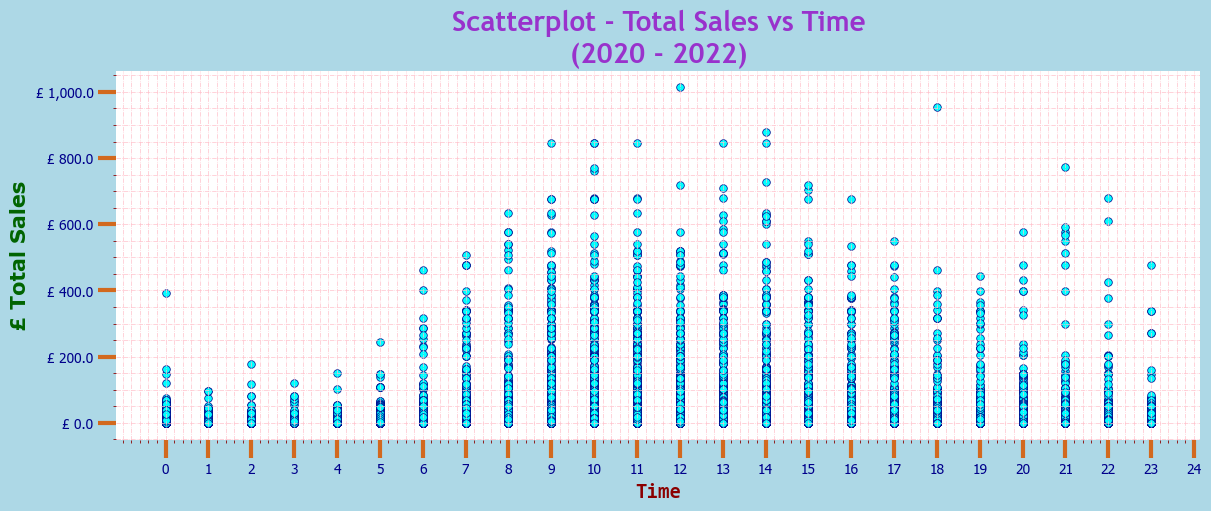

In [198]:
x_label_font = {'family':'consolas','color':'darkred','size':15,'style':'normal','weight':'bold'}
y_label_font = {'family':'verdana','color':'darkgreen','size':15,'style':'normal','weight':'bold'}
title_font = {'family':'trebuchet ms','color':'darkorchid','size':20,'style':'normal','weight':'bold'}
text_font = {'ha':'center','va':'bottom','family':'georgia','color':'green','size':8,'style':'normal','weight':'bold'}

#==#

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(12,5),layout='constrained',facecolor='lightblue',dpi=100)

#==#

plt.scatter(xvalues,yvalues,label=xvalues,s=30,color='cyan',marker='o',linewidths=0.5,edgecolor='darkblue')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
# ax.set_yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000])
ax.set_xlabel('Time',loc='center',fontdict=x_label_font) # Independent Varianle
ax.set_ylabel('£ Total Sales',loc='center',fontdict=y_label_font) # Dependent Variable
ax.yaxis.set_major_formatter(StrMethodFormatter('£ {x:,}'))
ax.tick_params(axis='both',colors='chocolate',direction='out',length=13,width=3,labelsize='medium',labelcolor='darkblue',labelfontfamily='tahoma')
ax.tick_params(axis='x',which='minor',color='darkred',bottom=True)
ax.tick_params(axis='y',which='minor',color='darkred',bottom=True)
ax.minorticks_on()
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_visible(False)
ax.set_facecolor('white')
ax.grid(which='both',linestyle='dashdot',color='pink',linewidth=0.5)
ax.set_title('Scatterplot - Total Sales vs Time\n' + '(2020 - 2022)',loc='center',fontdict=title_font)
# ax.set_xlim(left=0,right=24)
# ax.set_ylim(bottom=0,top=1500)
# ax.autoscale()

#==#

my_path = r"\Users\tailb\Python-Documents\os\PNG Files\Ghp"
plt.savefig(my_path + '/matplotlibscatterplotexreg.png',transparent=None,dpi='figure',format=None,metadata=None,bbox_inches='tight',pad_inches=0.1,facecolor='auto',edgecolor='yellow',backend=None)

#==#

plt.show()


### `Fit Linear Regression Model`.

In [199]:
total_sales_model = LinearRegression()
total_sales_model.fit(xvalues,yvalues)

LinearRegression()

### `Y value prediction`.

- `We want to make a prediction of the Y value based on whatever value X value we feed`.
- `The prediction values will be our ‘line of best fit’`.

In [200]:
yvalues_pred = total_sales_model.predict(xvalues)
# print(yvalues_pred)

### `Plot Scatterplot with 'line of best fit'`.

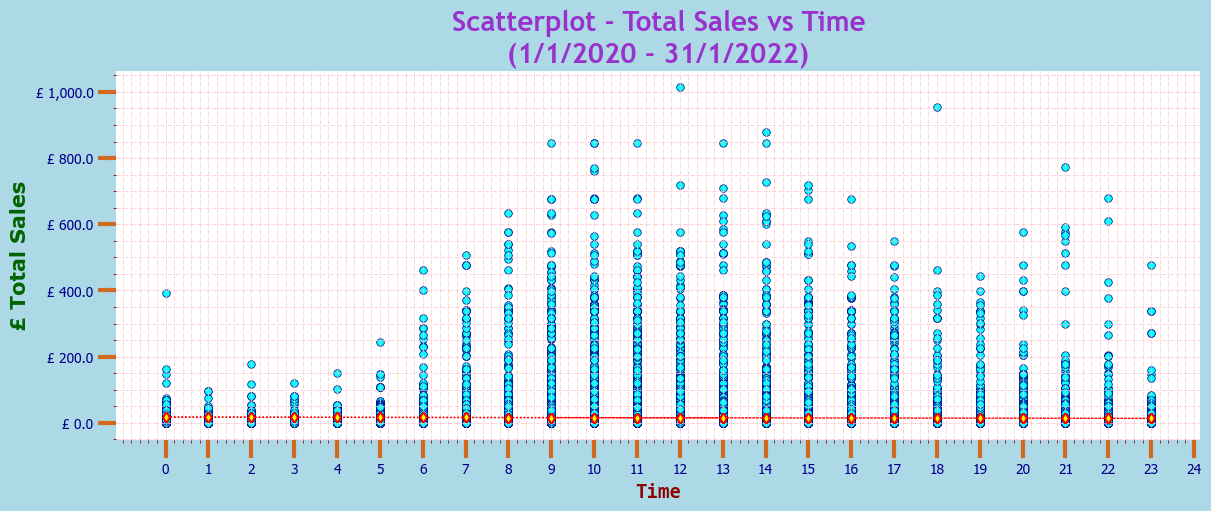

In [201]:
x_label_font = {'family':'consolas','color':'darkred','size':15,'style':'normal','weight':'bold'}
y_label_font = {'family':'verdana','color':'darkgreen','size':15,'style':'normal','weight':'bold'}
title_font = {'family':'trebuchet ms','color':'darkorchid','size':20,'style':'normal','weight':'bold'}
text_font = {'ha':'center','va':'bottom','family':'georgia','color':'green','size':8,'style':'normal','weight':'bold'}

#==#

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(12,5),layout='constrained',facecolor='lightblue',dpi=100)

#==#

plt.scatter(xvalues,yvalues,label=xvalues,s=30,color='cyan',marker='o',linewidths=0.5,edgecolor='darkblue')
plt.plot(xvalues,yvalues_pred,marker='d',markersize=5,markeredgecolor='red',markeredgewidth=1,markerfacecolor='yellow',linestyle='dotted',color='red',linewidth=1)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
# ax.set_yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000])
ax.set_xlabel('Time',loc='center',fontdict=x_label_font) # Independent Varianle
ax.set_ylabel('£ Total Sales',loc='center',fontdict=y_label_font) # Dependent Variable
ax.yaxis.set_major_formatter(StrMethodFormatter('£ {x:,}'))
ax.tick_params(axis='both',colors='chocolate',direction='out',length=13,width=3,labelsize='medium',labelcolor='darkblue',labelfontfamily='tahoma')
ax.tick_params(axis='x',which='minor',color='darkred',bottom=True)
ax.tick_params(axis='y',which='minor',color='darkred',bottom=True)
ax.minorticks_on()
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_visible(False)
ax.set_facecolor('white')
ax.grid(which='both',linestyle='dashdot',color='pink',linewidth=0.5)
ax.set_title('Scatterplot - Total Sales vs Time\n' + '(1/1/2020 - 31/1/2022)',loc='center',fontdict=title_font)
# ax.set_xlim(left=0,right=24)
# ax.set_ylim(bottom=0,top=1500)
# ax.autoscale()

#==#

my_path = r"\Users\tailb\Python-Documents\os\PNG Files\Ghp"
plt.savefig(my_path + '/matplotlibscatterplotreg.png',transparent=None,dpi='figure',format=None,metadata=None,bbox_inches='tight',pad_inches=0.1,facecolor='auto',edgecolor='yellow',backend=None)

#==#

plt.show()


# `Conclusion`.

- `There is no Linear Realtionship between Total Sales and Time`.
- `Linear Regression is not the best model to use`. 
- `Great for Clustering or Classification`.